<a href="https://colab.research.google.com/github/mloey/Test/blob/master/fineTuning(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy.ndimage

Using TensorFlow backend.


In [0]:
!wget https://www.dropbox.com/s/h5yora9j0onglw6/train.zip?dl=0

--2019-03-18 14:10:41--  https://www.dropbox.com/s/h5yora9j0onglw6/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/h5yora9j0onglw6/train.zip [following]
--2019-03-18 14:10:41--  https://www.dropbox.com/s/raw/h5yora9j0onglw6/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc02eda25b2b5e7efb4739cf78a5.dl.dropboxusercontent.com/cd/0/inline/AdVKsu1DXAdCj10Bi0yKcY5buTVMJfdz2KAzIUq3oJZZ_qpcR5s9VR_GTLko0R6a35pdUvdSNm6c0dVAOQUkVBl5leRlYgSsbOC2nqqr1MiJSg/file# [following]
--2019-03-18 14:10:41--  https://uc02eda25b2b5e7efb4739cf78a5.dl.dropboxusercontent.com/cd/0/inline/AdVKsu1DXAdCj10Bi0yKcY5buTVMJfdz2KAzIUq3oJZZ_qpcR5s9VR_GTLko0R6a35pdUvdSNm6c0dVAOQUkVBl5leRlYgSsbOC2nqqr1MiJSg/file
Resolving uc02eda25b2b5

In [0]:
!unzip train.zip?dl=0

Archive:  train.zip?dl=0
   creating: train/
   creating: train/Acne and Rosacea Photos/
  inflating: train/Acne and Rosacea Photos/07Acne081101.jpg  
  inflating: train/Acne and Rosacea Photos/07AcnePittedScars.jpg  
  inflating: train/Acne and Rosacea Photos/07AcnePittedScars1.jpg  
  inflating: train/Acne and Rosacea Photos/07PerioralDermEye.jpg  
  inflating: train/Acne and Rosacea Photos/07PerioralDermNose.jpg  
  inflating: train/Acne and Rosacea Photos/07PerioralDermq.jpg  
  inflating: train/Acne and Rosacea Photos/07PerioralSteroid1.jpg  
  inflating: train/Acne and Rosacea Photos/07PerlecheAccutane.jpg  
  inflating: train/Acne and Rosacea Photos/07Rhinophyma1.jpg  
  inflating: train/Acne and Rosacea Photos/07Rhinophyma1a.jpg  
  inflating: train/Acne and Rosacea Photos/07Rhinophymaq.jpg  
  inflating: train/Acne and Rosacea Photos/07rhnophymas032105.jpg  
  inflating: train/Acne and Rosacea Photos/07rhnophymas0321051.jpg  
  inflating: train/Acne and Rosacea Photos/07rosace

In [0]:
!wget https://www.dropbox.com/s/c94io61nmldcgv8/test.zip?dl=0

--2019-03-18 14:11:42--  https://www.dropbox.com/s/c94io61nmldcgv8/test.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/c94io61nmldcgv8/test.zip [following]
--2019-03-18 14:11:42--  https://www.dropbox.com/s/raw/c94io61nmldcgv8/test.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc52aadc9c4ff45283610f060338.dl.dropboxusercontent.com/cd/0/inline/AdVqC5eCcQ53aLgSH98phngHZdVAQUl9txDVIfyMpX_Oe38mm-dV64drwCfZWqme3nAt1fgdXiqiOPquMKDgzGvrhJn9SGMStfn1bHJ_LqImXw/file# [following]
--2019-03-18 14:11:42--  https://uc52aadc9c4ff45283610f060338.dl.dropboxusercontent.com/cd/0/inline/AdVqC5eCcQ53aLgSH98phngHZdVAQUl9txDVIfyMpX_Oe38mm-dV64drwCfZWqme3nAt1fgdXiqiOPquMKDgzGvrhJn9SGMStfn1bHJ_LqImXw/file
Resolving uc52aadc9c4ff452

In [0]:
!unzip test.zip?dl=0

Archive:  test.zip?dl=0
   creating: test/
   creating: test/Acne and Rosacea Photos/
  inflating: test/Acne and Rosacea Photos/07PerioralDermEye.jpg  
  inflating: test/Acne and Rosacea Photos/07Rhinophyma1.jpg  
  inflating: test/Acne and Rosacea Photos/07rhnophymas0321051.jpg  
  inflating: test/Acne and Rosacea Photos/07RosaceaFulFAce.jpg  
  inflating: test/Acne and Rosacea Photos/07RosaceaMilia0120.jpg  
  inflating: test/Acne and Rosacea Photos/07RosaceaOK0828063.jpg  
  inflating: test/Acne and Rosacea Photos/07sebDerem1101051.jpg  
  inflating: test/Acne and Rosacea Photos/07SteroidPerioral.jpg  
  inflating: test/Acne and Rosacea Photos/07SteroidPerioral1.jpg  
  inflating: test/Acne and Rosacea Photos/07VascularFace0120.jpg  
  inflating: test/Acne and Rosacea Photos/08PerioralDerm1.jpg  
  inflating: test/Acne and Rosacea Photos/acne-closed-comedo-003.jpg  
  inflating: test/Acne and Rosacea Photos/acne-closed-comedo-1.jpg  
  inflating: test/Acne and Rosacea Photos/acne-cl

In [0]:
train_path = "train/"

test_path = "test/"

In [0]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


58892288/58889256 [==============================] - 2s 0us/step


In [0]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f98dbffc9b0> False
<keras.layers.convolutional.Conv2D object at 0x7f98dbffca20> False
<keras.layers.convolutional.Conv2D object at 0x7f98dbffcba8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f98dc230208> False
<keras.layers.convolutional.Conv2D object at 0x7f98dc091e10> False
<keras.layers.convolutional.Conv2D object at 0x7f98dc390d30> False
<keras.layers.pooling.MaxPooling2D object at 0x7f98dbfc8588> False
<keras.layers.convolutional.Conv2D object at 0x7f98dbfc8390> False
<keras.layers.convolutional.Conv2D object at 0x7f98dc279240> False
<keras.layers.convolutional.Conv2D object at 0x7f98dc261860> False
<keras.layers.pooling.MaxPooling2D object at 0x7f98dc3f9898> False
<keras.layers.convolutional.Conv2D object at 0x7f98dc3f9fd0> False
<keras.layers.convolutional.Conv2D object at 0x7f98dc37fb00> False
<keras.layers.convolutional.Conv2D object at 0x7f98dc364518> False
<keras.layers.pooling.MaxPooling2D object at 0x7f98dc317b00>

In [0]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(23, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
___________________________

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      featurewise_center=True,
      featurewise_std_normalization=True,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 32
 
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(128, 128),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        test_path,
        target_size=(128, 128),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 15557 images belonging to 23 classes.
Found 4002 images belonging to 23 classes.


In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history =model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('small_last4.hdf5')

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


156/155 [==============================] - 229s 1s/step - loss: 2.8469 - acc: 0.1670 - val_loss: 2.6459 - val_acc: 0.2159
Epoch 2/100
156/155 [==============================] - 209s 1s/step - loss: 2.6741 - acc: 0.2167 - val_loss: 2.5952 - val_acc: 0.2261
Epoch 3/100
156/155 [==============================] - 209s 1s/step - loss: 2.5604 - acc: 0.2480 - val_loss: 2.4383 - val_acc: 0.2804
Epoch 4/100
156/155 [==============================] - 207s 1s/step - loss: 2.4760 - acc: 0.2722 - val_loss: 2.3943 - val_acc: 0.2889
Epoch 5/100
156/155 [==============================] - 206s 1s/step - loss: 2.3978 - acc: 0.2955 - val_loss: 2.3247 - val_acc: 0.3173
Epoch 6/100
156/155 [==============================] - 206s 1s/step - loss: 2.3287 - acc: 0.3155 - val_loss: 2.3300 - val_acc: 0.3166
Epoch 7/100
156/155 [==============================] - 206s 1s/step - loss: 2.2607 - acc: 0.3371 - val_loss: 2.3097 - val_acc: 0.3258
Epoch 8/100
156/155 [==============================] - 204s 1s/step - loss

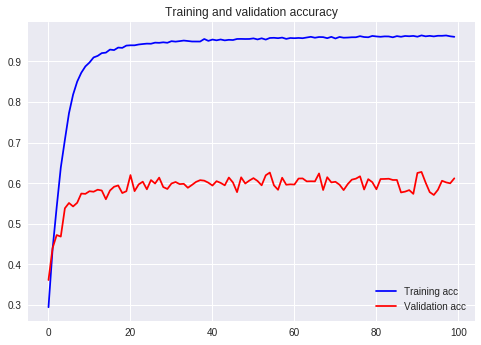

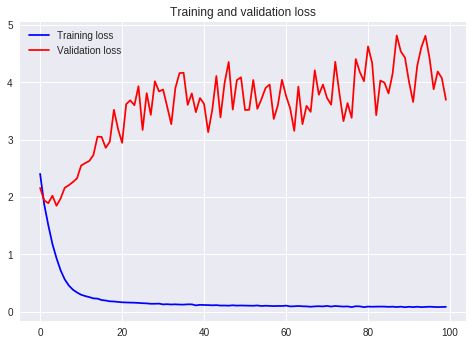

In [0]:
import matplotlib.pyplot as plt 
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [0]:
from keras.preprocessing import image
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        test_path,
        target_size=(75, 75),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = image.load_img('{}/{}'.format(test_path,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()